<a href="https://colab.research.google.com/github/dwonn201/KaggleStudy/blob/master/Used%20Cars%20Dataset/Craiglist%EC%A4%91%EA%B3%A0_%EC%9E%90%EB%8F%99%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Craiglist중고 자동차 데이터 분석
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data


----------

## 데이터 소개
    - Kaggle 내 Used Cars Dataset을 사용합니다.
    - Craigslist라는 세계 최대 중고차 거래 사이트에서 자동으로 scrapping되어 정기적으로 적재되어 있습니다.
    - 각 컬럼 정보는 아래와 같습니다.

---------

    - vehicles.csv
    id : 중고차 거래의 아이디 (entry ID)
    url : 중고차 거래 페이지 (listing URL)
    region : 해당 거래의 관리 지점 (craigslist region)
    region_url : 거래 관리 지점의 홈페이지 (region URL)
    price : 자동차 거래가 (entry price)
    year : 자동차 생산년도 (entry year)
    manufacturer : 자동차 제조사 (manufacturer of vehicle)
    model : 자동차 모델명 (model of vehicle)
    condition : 자동차 상태 (condition of vehicle)
    cylinders : 자동차 기통 수 (number of cylinders)
    fuel : 자동차 연료 타입 (fuel type)
    odometer : 자동차 운행 마일 수 (miles traveled by vehicle)
    title_status : 자동차 타이틀 상태 (소유주 등록 상태) (title status of vehicle)
    transmission : 자동차 트랜스미션 종류 (transmission of vehicle)
    vin : 자동차 식별 번호 (vehicle identification number)
    drive : 자동차 구동 타입 (type of drive)
    size : 자동차 크기 (size of vehicle)
    type : 자동차 일반 타입 ex. 세단, suv, ... (generic type of vehicle) 
    paint_color : 자동차 색상 (color of vehicle)
    image_url : 자동차 이미지 url (image URL)
    description : 세부 설명 (listed description of vehicle)
    county : 실수로 생성된 미사용 컬럼 (useless column left in by mistake)
    state : 거래가 등록된 미 주 (state of listing)
    lat : 거래가 등록된 곳의 위도 (latitude of listing)
    long : 거래가 등록된 곳의 경도 (longitude of listing)
    posting_date : 거래가 포스팅된 일자 (posting_date)
    


## Step 1. 데이터셋 준비하기

### 1. Colab Notebook에 Kaggle API 세팅


In [1]:
import os

# os.environ을 이용하여 Kaggle API Username, Key 세팅
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''


### 2. 데이터 다운로드 및 압축 해제

In [2]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드 및 압축 해제
!rm *.*
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'

100% 262M/262M [00:01<00:00, 121MB/s]
100% 262M/262M [00:01<00:00, 139MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


### 3. Pandas 라이브러리로 csv파일 읽어들이기


In [3]:
import pandas as pd
import numpy as np

In [4]:
 df = pd.read_csv('vehicles.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 4. 불필요한 데이터 데이터프레임에서 제거하기


In [5]:
# 데이터 확인
print(df.shape)
df.head()

(426880, 26)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [8]:
# Price의 경우 null값이 0으로 들어갔을 수 있음. outlier확인 필요가 있음
# year가 1900인경우 이상치
# odometer 역시 null값이 0으로 들어간것으로 추정.
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [9]:
data = df.copy()

In [10]:
print(data.shape)
data.head()

(426880, 26)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [11]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [12]:
# 불필요컬럼 제거
unneccessary_columns = ['id',             # 중고차 거래의 아이디 (entry ID)
                        'url',            # 중고차 거래 페이지 (listing URL)
                        #'region',        # 해당 거래의 관리 지점 (craigslist region)
                        'region_url',     # 거래 관리 지점의 홈페이지 (region URL)
                        #'price',         # 자동차 가격 (entry price)
                        #'year',          # 자동차 생산년도 (entry year)
                        #'manufacturer',  # 자동차 제조사 (manufacturer of vehicle)
                        #'model',         # 자동차 모델명 (model of vehicle)
                        #'condition',     # 자동차 상태 (condition of vehicle)
                        #'cylinders',     # 자동차 기통 수 (number of cylinders)
                        #'fuel',          # 자동차 연료 타입 (fuel type)
                        #'odometer',      # 자동차 운행 마일 수 (miles traveled by vehicle)
                        #'title_status',  # 자동차 타이틀 상태 (소유주 등록 상태) (title status of vehicle)
                        #'transmission',  # 자동차 트랜스미션 종류 (transmission of vehicle)
                        'VIN',            # 자동차 식별 번호 (vehicle identification number)
                        #'drive',         # 자동차 구동 타입 (type of drive)
                        #'size',          # 자동차 크기 (size of vehicle)
                        #'type',          # 자동차 일반 타입 ex. 세단, suv, pickup, 등 ... (generic type of vehicle) 
                        #'paint_color',   # 자동차 색상 (color of vehicle)
                        'image_url',      # 자동차 이미지 url (image URL)
                        'description',    # 자동차 세부 설명 (listed description of vehicle)  -> 추후 자연어 처리를 통해 변수로 사용할 수 있을것 같음
                        'county',         # 실수로 생성된 미사용 컬럼 (useless column left in by mistake)
                        #'state',          # 거래가 등록된 주 (state of listing)              -> EDA 후 region과 state 중 하나 선택 
                        'lat',            # 거래가 등록된 위치의 위도 (latitude of listing)   -> region을 살리므로 제거
                        'long',           # 거래가 등록된 위치의 경도 (longitude of listing)  -> region을 살리므로 제거
                        'posting_date'    # 거래가 포스팅된 일자 (posting_date)
                        ]

In [13]:
data.drop(unneccessary_columns, axis = 1, inplace = True)

In [14]:
import datetime
date = datetime.date.today()
print(f"Current Year -> {date.year}")

Current Year -> 2022


In [15]:
# 자동차 생산 후 기간 컬럼 생성
# 자동차 생산년도 정도가 있으므로 현재년도 - 생산년도 = 자동차 생산 후 기간 생성
data['age'] = date.year - data['year']
data.drop(['year'], axis = 1, inplace = True)

In [16]:
print(data.shape)
data.head()

(426880, 16)


,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


### 5. 범주형 데이터 분석


In [17]:
data.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state', 'age'],
      dtype='object')

In [18]:
print("num of region :", len(data['region'].value_counts()))
data['region'].value_counts()

num of region : 404


columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

지역으로 봤을때 400개가 넘는 지역이 존재함.

In [19]:
print("num of state :", len(data['state'].value_counts()))
data['state'].value_counts()

num of state : 51


ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: state, dtype: int64

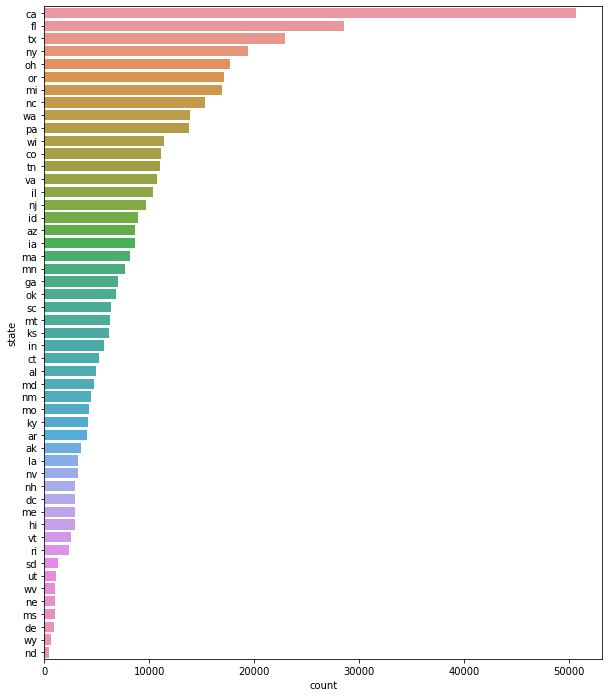

In [20]:
# 분포확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,12))
sns.countplot(y = 'state', data = data.fillna('None'), order = data.fillna('None')['state'].value_counts().index)

캘리포니아주의 비중이 가장 높으며, 플로리다, 텍사스 주에서도 많이 발생함. 

In [21]:
print("num of manufacturer :", len(data['manufacturer'].value_counts()))
data['manufacturer'].value_counts()

num of manufacturer : 42


ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


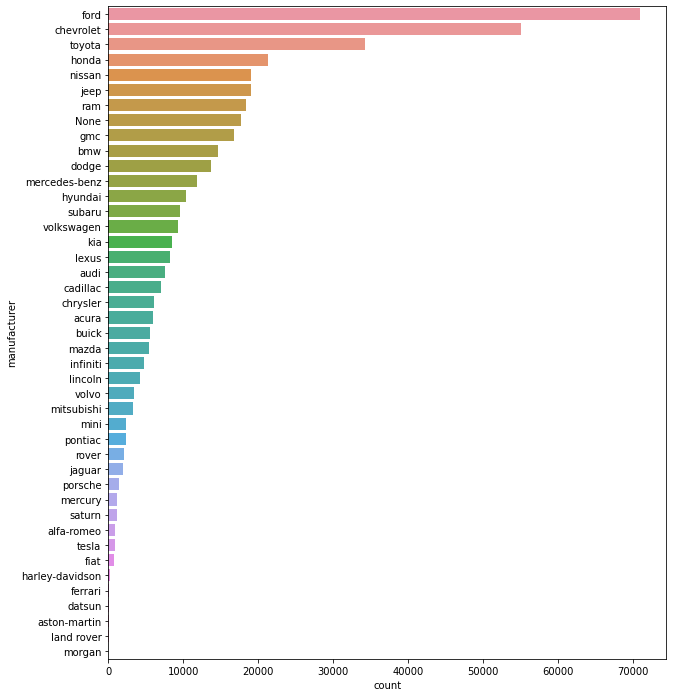

In [22]:

plt.figure(figsize = (10,12))
sns.countplot(y = 'manufacturer', data = data.fillna('None'), order = data.fillna('None')['manufacturer'].value_counts().index)

n/a 와 수가 적은 소수 카테고리들은 기타로 묶어줄 필요가 있어보임

In [23]:
print("num of model :", len(data['model'].value_counts()))
data['model'].value_counts()

num of model : 29667


f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: model, Length: 29667, dtype: int64

차량 모델 수도 많고 개인이 임의로 작성했기 때문에 같은 모델이더라도 다르게 기입됐을 수 있음.  
때문에 1건만 등록된 차량 모델도 다수 존재.
정제 필요

In [24]:
print("num of condition :", len(data.fillna('none')['condition'].value_counts()))
data.fillna('none')['condition'].value_counts()

num of condition : 7


none         174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

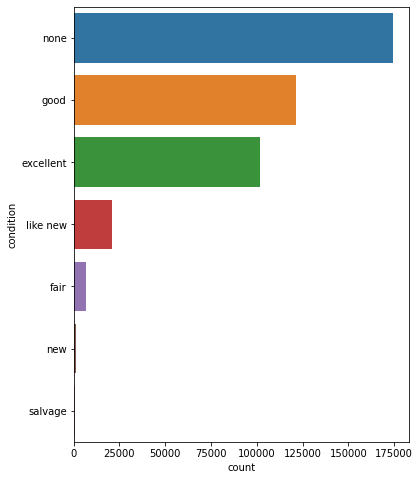

In [25]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'condition', data = data.fillna('none'), order = data.fillna('none')['condition'].value_counts().index)

none 값이 다수 존재

In [26]:
print("num of cylinders :", len(data.fillna('None')['cylinders'].value_counts()))
data.fillna('None')['cylinders'].value_counts()

num of cylinders : 9


None            177678
6 cylinders      94169
4 cylinders      77642
8 cylinders      72062
5 cylinders       1712
10 cylinders      1455
other             1298
3 cylinders        655
12 cylinders       209
Name: cylinders, dtype: int64

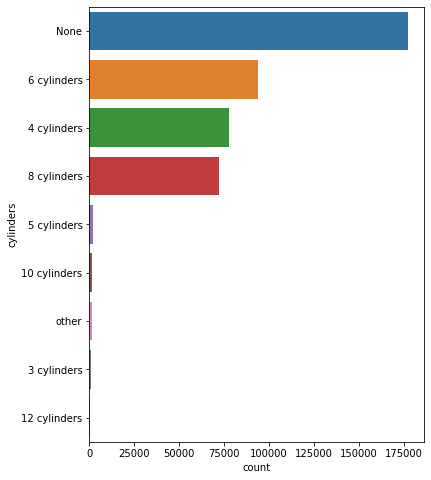

In [27]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'cylinders', data = data.fillna('None'), order = data.fillna('None')['cylinders'].value_counts().index)

In [28]:
print("num of fuel :", len(data.fillna('None')['fuel'].value_counts()))
data.fillna('None')['fuel'].value_counts()

num of fuel : 6


gas         356209
other        30728
diesel       30062
hybrid        5170
None          3013
electric      1698
Name: fuel, dtype: int64

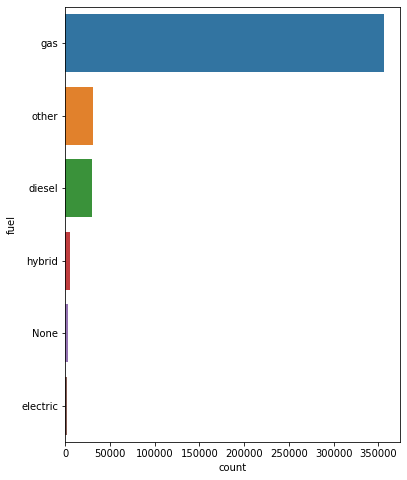

In [29]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'fuel', data = data.fillna('None'), order = data.fillna('None')['fuel'].value_counts().index)

대부분 gas차

In [30]:
print("num of transmission :", len(data.fillna('None')['transmission'].value_counts()))
data.fillna('None')['transmission'].value_counts()

num of transmission : 4


automatic    336524
other         62682
manual        25118
None           2556
Name: transmission, dtype: int64

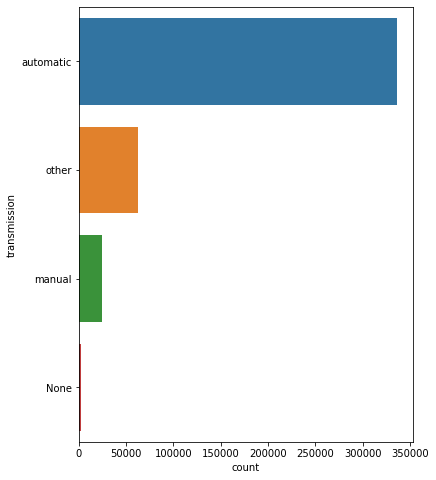

In [31]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'transmission', data = data.fillna('None'), order = data.fillna('None')['transmission'].value_counts().index)

In [32]:
print("num of drive :", len(data.fillna('None')['drive'].value_counts()))
data.fillna('None')['drive'].value_counts()

num of drive : 4


4wd     131904
None    130567
fwd     105517
rwd      58892
Name: drive, dtype: int64

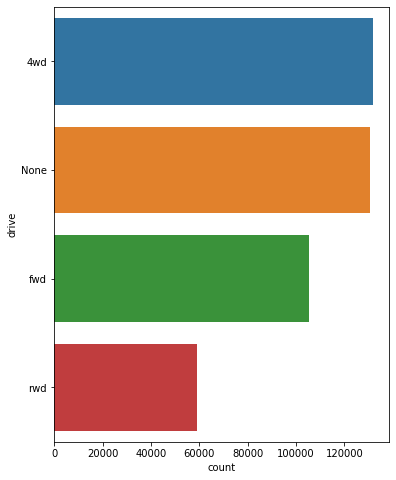

In [33]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'drive', data = data.fillna('None'), order = data.fillna('None')['drive'].value_counts().index)

In [34]:
print("num of size :", len(data.fillna('None')['size'].value_counts()))
data.fillna('None')['size'].value_counts()

num of size : 5


None           306361
full-size       63465
mid-size        34476
compact         19384
sub-compact      3194
Name: size, dtype: int64

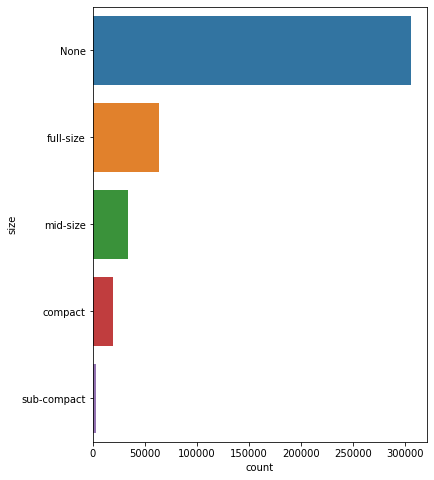

In [35]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'size', data = data.fillna('None'), order = data.fillna('None')['size'].value_counts().index)

In [36]:
print("num of type :", len(data.fillna('None')['type'].value_counts()))
data.fillna('None')['type'].value_counts()

num of type : 14


None           92858
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

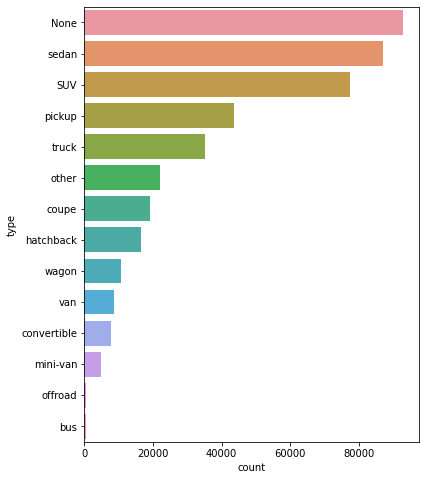

In [37]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'type', data = data.fillna('None'), order = data.fillna('None')['type'].value_counts().index)

In [38]:
print("num of paint_color :", len(data.fillna('None')['paint_color'].value_counts()))
data.fillna('None')['paint_color'].value_counts()

num of paint_color : 13


None      130203
white      79285
black      62861
silver     42970
blue       31223
red        30473
grey       24416
green       7343
custom      6700
brown       6593
yellow      2142
orange      1984
purple       687
Name: paint_color, dtype: int64

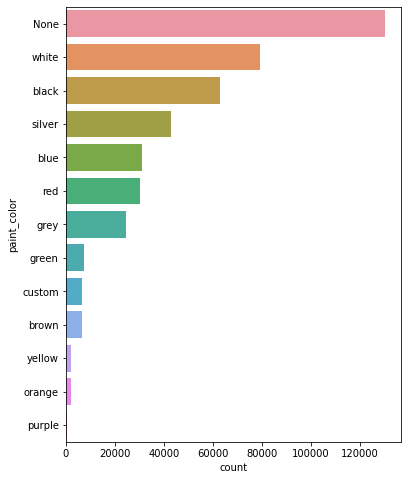

In [39]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'paint_color', data = data.fillna('None'), order = data.fillna('None')['paint_color'].value_counts().index)

### 6. 수치형 데이터 분석

In [40]:
data.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state', 'age'],
      dtype='object')

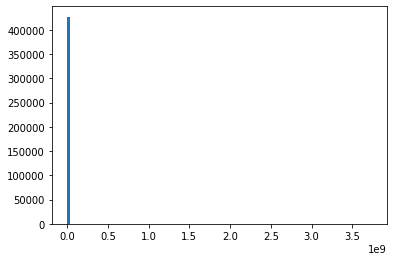

In [41]:
# sns.histplot(x='price', data = data) 
plt.hist(data['price'],
         bins = 100,
         )
plt.show()

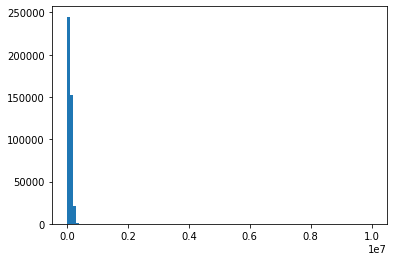

In [42]:
plt.hist(data['odometer'],
         bins = 100,
         )
plt.show()

price와 odometer 모두 outlier가 존재하며 한쪽에 몰려있음.

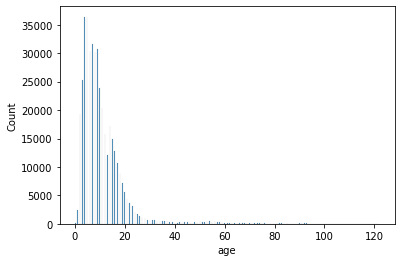

In [43]:
sns.histplot(x='age', data = data)

## Step 3. 데이터 클리닝

### 7. 범주형 데이터 클리닝

In [44]:
data.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state', 'age'],
      dtype='object')

In [45]:
cat_columns = ['state', 'manufacturer', 'model',
               'condition', 'cylinders', 'fuel', 
               'title_status', 'transmission', 
               'drive', 'size', 'type', 'paint_color']

ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: state, dtype: int64
51


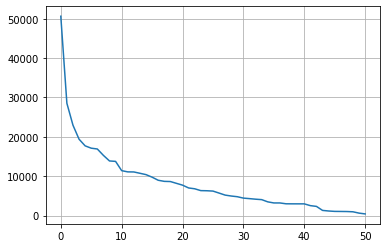

In [46]:
cnt = data['state'].fillna('None').value_counts()
print(cnt)
print(len(cnt))
plt.grid()
plt.plot(range(len(cnt)), cnt)

In [47]:
df_state = pd.DataFrame(cnt).reset_index().rename(columns = {'index' : 'state', 'state':'cnts'})
cnts_total = sum(df_state['cnts'])
df_state['ratio'] = df_state['cnts']/cnts_total * 100
cum_ratio = []
a = 0
for i in range(0, len(df_state)):
  a += df_state['ratio'][i]
  cum_ratio.append(a)

df_state['cum_ratio'] = cum_ratio
df_state

,state,cnts,ratio,cum_ratio
0,ca,50614,11.856728,11.856728
1,fl,28511,6.678926,18.535654
2,tx,22945,5.375047,23.910701
3,ny,19386,4.541323,28.452024
4,oh,17696,4.145427,32.597451
5,or,17104,4.006747,36.604198
6,mi,16900,3.958958,40.563156
7,nc,15277,3.578757,44.141913
8,wa,13861,3.247048,47.388962
9,pa,13753,3.221749,50.610710


하위 10%(20개 주) grouping -> 보류

In [48]:
# grouping = cnt.index[31:]
# grouping

In [49]:
# data['state_gr'] = data['state'].fillna('others').apply(lambda x: x if str(x) not in grouping else 'others')

In [50]:
# print(data['state_gr'].nunique(), data['state'].nunique())

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
NA                 17646
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63


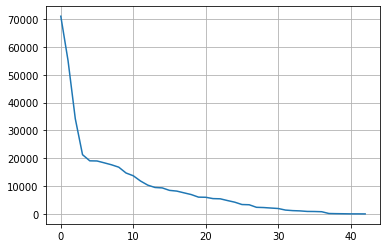

In [51]:
cnt = data['manufacturer'].fillna('NA').value_counts()
print(cnt)
print(len(cnt))
plt.grid()
plt.plot(range(len(cnt)), cnt)

In [52]:
df_manf = pd.DataFrame(cnt.drop('NA')).reset_index().rename(columns = {'index' : 'Manufacturer', 'manufacturer':'cnts'})
cnts_total = sum(df_manf['cnts'])
df_manf['ratio'] = df_manf['cnts']/cnts_total * 100
cum_ratio = []
a = 0
for i in range(0, len(df_manf)):
  a += df_manf['ratio'][i]
  cum_ratio.append(a)

df_manf['cum_ratio'] = cum_ratio
df_manf

,Manufacturer,cnts,ratio,cum_ratio
0,ford,70985,17.345822,17.345822
1,chevrolet,55064,13.455382,30.801204
2,toyota,34202,8.357566,39.158770
3,honda,21269,5.197271,44.356041
4,nissan,19067,4.659193,49.015233
5,jeep,19014,4.646242,53.661475
6,ram,18342,4.482032,58.143507
7,gmc,16785,4.101565,62.245073
8,bmw,14699,3.591833,65.836905
9,dodge,13707,3.349428,69.186333


null값을 제외한 제조사별 분포를 살펴봤을때 하위 10개가 전체 제조사 중 1%에 불과함. 

하위 10개의 경우 전체의 1%에 불과하며 수도 많지 않기 때문에 null과 함께 others 로 grouping

In [53]:
grouping = cnt.drop('NA').index[31:]
grouping

Index(['mercury', 'saturn', 'alfa-romeo', 'tesla', 'fiat', 'harley-davidson',
       'ferrari', 'datsun', 'aston-martin', 'land rover', 'morgan'],
      dtype='object')

In [54]:
data['manufacturer_gr'] = data['manufacturer'].fillna('other').apply(lambda x: x if str(x) not in grouping else 'other')

In [55]:
data['manufacturer_gr'].value_counts()

ford             70985
chevrolet        55064
toyota           34202
other            22836
honda            21269
nissan           19067
jeep             19014
ram              18342
gmc              16785
bmw              14699
dodge            13707
mercedes-benz    11817
hyundai          10338
subaru            9495
volkswagen        9345
kia               8457
lexus             8200
audi              7573
cadillac          6953
chrysler          6031
acura             5978
buick             5501
mazda             5427
infiniti          4802
lincoln           4220
volvo             3374
mitsubishi        3292
mini              2376
pontiac           2288
rover             2113
jaguar            1946
porsche           1384
Name: manufacturer_gr, dtype: int64

In [56]:
print(data['manufacturer_gr'].nunique(), data['manufacturer'].nunique())

32 42


f-150                       8009
NA                          5277
silverado 1500              5140
1500                        4211
camry                       3135
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: model, Length: 29668, dtype: int64
29668


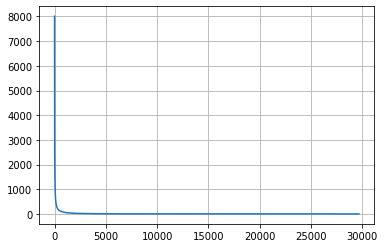

In [57]:
cnt = data['model'].fillna('NA').value_counts()
print(cnt)
print(len(cnt))
plt.grid()
plt.plot(range(len(cnt)), cnt)

In [58]:
df_model = pd.DataFrame(cnt.drop('NA')).reset_index().rename(columns = {'index' : 'model', 'model':'cnts'})
cnts_total = sum(df_model['cnts'])
df_model['ratio'] = df_model['cnts']/cnts_total * 100
cum_ratio = []
a = 0
for i in range(0, len(df_model)):
  a += df_model['ratio'][i]
  cum_ratio.append(a)

df_model['cum_ratio'] = cum_ratio
df_model

,model,cnts,ratio,cum_ratio
0,f-150,8009,1.899654,1.899654
1,silverado 1500,5140,1.219156,3.118811
2,1500,4211,0.998807,4.117618
3,camry,3135,0.743591,4.861208
4,silverado,3023,0.717025,5.578234
...,...,...,...,...
29662,Huyndai Sante Fe Limited,1,0.000237,99.999051
29663,astro awd 4x4,1,0.000237,99.999288
29664,escalade and,1,0.000237,99.999526
29665,cx 3,1,0.000237,99.999763


In [59]:
df_model.head(20)

,model,cnts,ratio,cum_ratio
0,f-150,8009,1.899654,1.899654
1,silverado 1500,5140,1.219156,3.118811
2,1500,4211,0.998807,4.117618
3,camry,3135,0.743591,4.861208
4,silverado,3023,0.717025,5.578234
5,accord,2969,0.704217,6.282451
6,wrangler,2848,0.675517,6.957968
7,civic,2799,0.663895,7.621862
8,altima,2779,0.659151,8.281013
9,escape,2746,0.651324,8.932337


In [60]:
df_model[df_model['ratio'] <0.1]

,model,cnts,ratio,cum_ratio
151,f350 super duty,419,0.099383,40.367123
152,beetle,416,0.098671,40.465794
153,g6,409,0.097011,40.562804
154,town and country,403,0.095588,40.658392
155,wrx,402,0.095350,40.753742
...,...,...,...,...
29662,Huyndai Sante Fe Limited,1,0.000237,99.999051
29663,astro awd 4x4,1,0.000237,99.999288
29664,escalade and,1,0.000237,99.999526
29665,cx 3,1,0.000237,99.999763


차량 모델의 경우 종류가 매우 많고 신뢰성이 떨어져 보임.  
ex) silverado 1500	모델의 경우 silverado와 1500 로도 각각 입력되어 있는것으로 보임.  
유사한 모델을 모두 합쳐줘야 하지만 약 3만개의 모델을 정제하기 어려움. -> 제외

num of values : 7
Value_Counts
NA           174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64
 
cars' condition ratio with na
   condition    cnts      ratio   cum_ratio
0         NA  174104  40.785232   40.785232
1       good  121456  28.452024   69.237256
2  excellent  101467  23.769443   93.006700
3   like new   21178   4.961113   97.967813
4       fair    6769   1.585692   99.553504
5        new    1305   0.305707   99.859211
6    salvage     601   0.140789  100.000000
 
cars' condition ratio
   condition    cnts      ratio   cum_ratio
0       good  121456  48.048865   48.048865
1  excellent  101467  40.141074   88.189939
2   like new   21178   8.378169   96.568108
3       fair    6769   2.677865   99.245973
4        new    1305   0.516267   99.762240
5    salvage     601   0.237760  100.000000


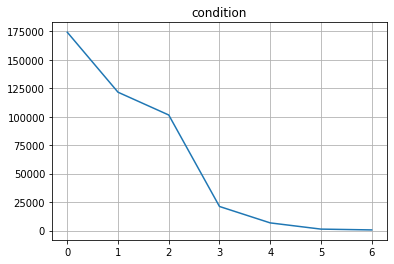

In [61]:

cnt = data['condition'].fillna('NA').value_counts()
print("num of values :", len(cnt))
print("Value_Counts")
print(cnt)

plt.grid()
plt.title('condition')
plt.plot(range(len(cnt)), cnt)

df_ratio_check_with_na = pd.DataFrame(cnt).reset_index().rename(columns = {'index' : 'condition', 'condition' :'cnts'})
cnts_total = sum(df_ratio_check_with_na['cnts'])
df_ratio_check_with_na['ratio'] = df_ratio_check_with_na['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check_with_na)):
  a += df_ratio_check_with_na['ratio'][i]
  cum_ratio.append(a)

df_ratio_check_with_na['cum_ratio'] = cum_ratio
print(" ")
print("cars' condition ratio with na")
print(df_ratio_check_with_na)

df_ratio_check = pd.DataFrame(cnt.drop('NA')).reset_index().rename(columns = {'index' : 'condition', 'condition' :'cnts'})
cnts_total = sum(df_ratio_check['cnts'])
df_ratio_check['ratio'] = df_ratio_check['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check)):
  a += df_ratio_check['ratio'][i]
  cum_ratio.append(a)

df_ratio_check['cum_ratio'] = cum_ratio
print(" ")
print("cars' condition ratio")
print(df_ratio_check)

차량 상태는 대부분 good, excellent, like new이다.  
차량을 판매하려면 대부분 상태가 좋다고 해야하기 때문으로 추정된다.  
결측값이 전체의 약 40% 를 차지하며, 결측값을 제외한 누적 비율의 경우 상위 4개 카테고리로 99%를 cover하기 때문에 결측값과 나머지 2개 카테고리(new, salvage)는 others 로 grouping

In [62]:
grouping =  cnt.drop('NA').index[4:]
print(grouping)

data['condition_gr'] = data['condition'].fillna('other').apply(lambda x: x if str(x) not in grouping else 'other')
print(data['condition_gr'].nunique(), data['condition'].nunique())
data['condition_gr'].value_counts()

Index(['new', 'salvage'], dtype='object')
5 6


other        176010
good         121456
excellent    101467
like new      21178
fair           6769
Name: condition_gr, dtype: int64

num of values : 9
Value_Counts
NA              177678
6 cylinders      94169
4 cylinders      77642
8 cylinders      72062
5 cylinders       1712
10 cylinders      1455
other             1298
3 cylinders        655
12 cylinders       209
Name: cylinders, dtype: int64
 
cars' cylinders ratio with na
      cylinders    cnts      ratio   cum_ratio
0            NA  177678  41.622470   41.622470
1   6 cylinders   94169  22.059829   63.682299
2   4 cylinders   77642  18.188250   81.870549
3   8 cylinders   72062  16.881091   98.751640
4   5 cylinders    1712   0.401049   99.152689
5  10 cylinders    1455   0.340845   99.493534
6         other    1298   0.304067   99.797601
7   3 cylinders     655   0.153439   99.951040
8  12 cylinders     209   0.048960  100.000000
 
cars' cylinders ratio
      cylinders   cnts      ratio   cum_ratio
0   6 cylinders  94169  37.788220   37.788220
1   4 cylinders  77642  31.156251   68.944471
2   8 cylinders  72062  28.917103   97.861574
3   5 cylinders   1712

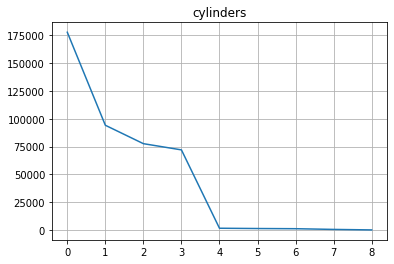

In [63]:

cnt = data['cylinders'].fillna('NA').value_counts()
print("num of values :", len(cnt))
print("Value_Counts")
print(cnt)

plt.grid()
plt.title('cylinders')
plt.plot(range(len(cnt)), cnt)

df_ratio_check_with_na = pd.DataFrame(cnt).reset_index().rename(columns = {'index' : 'cylinders', 'cylinders' :'cnts'})
cnts_total = sum(df_ratio_check_with_na['cnts'])
df_ratio_check_with_na['ratio'] = df_ratio_check_with_na['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check_with_na)):
  a += df_ratio_check_with_na['ratio'][i]
  cum_ratio.append(a)

df_ratio_check_with_na['cum_ratio'] = cum_ratio
print(" ")
print("cars' cylinders ratio with na")
print(df_ratio_check_with_na)

df_ratio_check = pd.DataFrame(cnt.drop('NA')).reset_index().rename(columns = {'index' : 'cylinders', 'cylinders' :'cnts'})
cnts_total = sum(df_ratio_check['cnts'])
df_ratio_check['ratio'] = df_ratio_check['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check)):
  a += df_ratio_check['ratio'][i]
  cum_ratio.append(a)

df_ratio_check['cum_ratio'] = cum_ratio
print(" ")
print("cars' cylinders ratio")
print(df_ratio_check)

4,6,8 cylinders 가 대부분을 차지하므로 4, 6,8, 기타로 grouping

In [64]:
grouping =  cnt.drop('NA').index[3:]
print(grouping)

data['cylinders_gr'] = data['cylinders'].fillna('other').apply(lambda x: x if str(x) not in grouping else 'other')
print(data['cylinders_gr'].nunique(), data['cylinders'].nunique())
data['cylinders_gr'].value_counts()

Index(['5 cylinders', '10 cylinders', 'other', '3 cylinders', '12 cylinders'], dtype='object')
4 8


other          183007
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
Name: cylinders_gr, dtype: int64

num of values : 6
Value_Counts
gas         356209
other        30728
diesel       30062
hybrid        5170
NA            3013
electric      1698
Name: fuel, dtype: int64
 
cars' fuel ratio with na
       fuel    cnts      ratio   cum_ratio
0       gas  356209  83.444762   83.444762
1     other   30728   7.198276   90.643038
2    diesel   30062   7.042260   97.685298
3    hybrid    5170   1.211113   98.896411
4        NA    3013   0.705819   99.602230
5  electric    1698   0.397770  100.000000
 
cars' fuel ratio
       fuel    cnts      ratio   cum_ratio
0       gas  356209  84.037918   84.037918
1     other   30728   7.249444   91.287361
2    diesel   30062   7.092319   98.379680
3    hybrid    5170   1.219722   99.599403
4  electric    1698   0.400597  100.000000


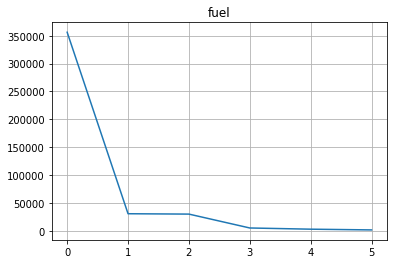

In [65]:

cnt = data['fuel'].fillna('NA').value_counts()
print("num of values :", len(cnt))
print("Value_Counts")
print(cnt)

plt.grid()
plt.title('fuel')
plt.plot(range(len(cnt)), cnt)

df_ratio_check_with_na = pd.DataFrame(cnt).reset_index().rename(columns = {'index' : 'fuel', 'fuel' :'cnts'})
cnts_total = sum(df_ratio_check_with_na['cnts'])
df_ratio_check_with_na['ratio'] = df_ratio_check_with_na['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check_with_na)):
  a += df_ratio_check_with_na['ratio'][i]
  cum_ratio.append(a)

df_ratio_check_with_na['cum_ratio'] = cum_ratio
print(" ")
print("cars' fuel ratio with na")
print(df_ratio_check_with_na)

df_ratio_check = pd.DataFrame(cnt.drop('NA')).reset_index().rename(columns = {'index' : 'fuel', 'fuel' :'cnts'})
cnts_total = sum(df_ratio_check['cnts'])
df_ratio_check['ratio'] = df_ratio_check['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check)):
  a += df_ratio_check['ratio'][i]
  cum_ratio.append(a)

df_ratio_check['cum_ratio'] = cum_ratio
print(" ")
print("cars' fuel ratio")
print(df_ratio_check)

fuel의 경우 대부분 gas차이며 결측값이 매우 작기때문에 결측값을 other로 포함

In [66]:
# grouping =  cnt.drop('NA').index[3:]
# print(grouping)

data['fuel_gr'] = data['fuel'].fillna('other')
print(data['fuel_gr'].nunique(), data['fuel'].fillna('NA').nunique())
data['fuel_gr'].value_counts()

5 6


gas         356209
other        33741
diesel       30062
hybrid        5170
electric      1698
Name: fuel_gr, dtype: int64

num of values : 7
Value_Counts
clean         405117
NA              8242
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64
 
cars' title_status ratio with na
  title_status    cnts      ratio   cum_ratio
0        clean  405117  94.901846   94.901846
1           NA    8242   1.930753   96.832599
2      rebuilt    7219   1.691108   98.523707
3      salvage    3868   0.906109   99.429816
4         lien    1422   0.333115   99.762931
5      missing     814   0.190686   99.953617
6   parts only     198   0.046383  100.000000
 
cars' title_status ratio
  title_status    cnts      ratio   cum_ratio
0        clean  405117  96.770241   96.770241
1      rebuilt    7219   1.724402   98.494642
2      salvage    3868   0.923949   99.418591
3         lien    1422   0.339673   99.758264
4      missing     814   0.194440   99.952704
5   parts only     198   0.047296  100.000000


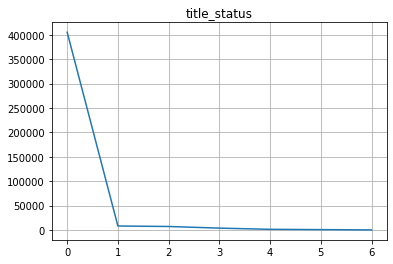

In [67]:

cnt = data['title_status'].fillna('NA').value_counts()
print("num of values :", len(cnt))
print("Value_Counts")
print(cnt)

plt.grid()
plt.title('title_status')
plt.plot(range(len(cnt)), cnt)

df_ratio_check_with_na = pd.DataFrame(cnt).reset_index().rename(columns = {'index' : 'title_status', 'title_status' :'cnts'})
cnts_total = sum(df_ratio_check_with_na['cnts'])
df_ratio_check_with_na['ratio'] = df_ratio_check_with_na['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check_with_na)):
  a += df_ratio_check_with_na['ratio'][i]
  cum_ratio.append(a)

df_ratio_check_with_na['cum_ratio'] = cum_ratio
print(" ")
print("cars' title_status ratio with na")
print(df_ratio_check_with_na)

df_ratio_check = pd.DataFrame(cnt.drop('NA')).reset_index().rename(columns = {'index' : 'title_status', 'title_status' :'cnts'})
cnts_total = sum(df_ratio_check['cnts'])
df_ratio_check['ratio'] = df_ratio_check['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check)):
  a += df_ratio_check['ratio'][i]
  cum_ratio.append(a)

df_ratio_check['cum_ratio'] = cum_ratio
print(" ")
print("cars' title_status ratio")
print(df_ratio_check)

차량 소유자 등록 상태(title status of vehicle)는 대부분 비어있으며(clean) 약 5%만이 다른 상태이다.

따라서 Clean과 Not_Clean 2개 그룹으로 grouping 

In [68]:
grouping =  cnt.index[1:]
print(grouping)

data['title_status_gr'] = data['title_status'].fillna('NA').apply(lambda x: x if str(x) not in grouping else 'Not_Clean')
print(data['title_status_gr'].nunique(), data['title_status'].nunique())
data['title_status_gr'].value_counts()

Index(['NA', 'rebuilt', 'salvage', 'lien', 'missing', 'parts only'], dtype='object')
2 6


clean        405117
Not_Clean     21763
Name: title_status_gr, dtype: int64

num of values : 4
Value_Counts
automatic    336524
other         62682
manual        25118
NA             2556
Name: transmission, dtype: int64
 
cars' transmission ratio with na
  transmission    cnts      ratio   cum_ratio
0    automatic  336524  78.833396   78.833396
1        other   62682  14.683752   93.517148
2       manual   25118   5.884089   99.401237
3           NA    2556   0.598763  100.000000
 
cars' transmission ratio
  transmission    cnts      ratio   cum_ratio
0    automatic  336524  79.308264   79.308264
1        other   62682  14.772202   94.080467
2       manual   25118   5.919533  100.000000


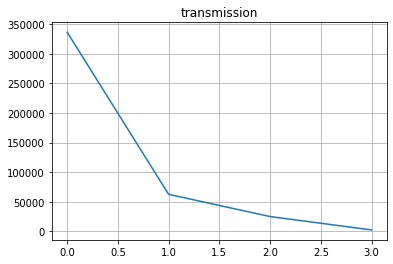

In [69]:

cnt = data['transmission'].fillna('NA').value_counts()
print("num of values :", len(cnt))
print("Value_Counts")
print(cnt)

plt.grid()
plt.title('transmission')
plt.plot(range(len(cnt)), cnt)

df_ratio_check_with_na = pd.DataFrame(cnt).reset_index().rename(columns = {'index' : 'transmission', 'transmission' :'cnts'})
cnts_total = sum(df_ratio_check_with_na['cnts'])
df_ratio_check_with_na['ratio'] = df_ratio_check_with_na['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check_with_na)):
  a += df_ratio_check_with_na['ratio'][i]
  cum_ratio.append(a)

df_ratio_check_with_na['cum_ratio'] = cum_ratio
print(" ")
print("cars' transmission ratio with na")
print(df_ratio_check_with_na)

df_ratio_check = pd.DataFrame(cnt.drop('NA')).reset_index().rename(columns = {'index' : 'transmission', 'transmission' :'cnts'})
cnts_total = sum(df_ratio_check['cnts'])
df_ratio_check['ratio'] = df_ratio_check['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check)):
  a += df_ratio_check['ratio'][i]
  cum_ratio.append(a)

df_ratio_check['cum_ratio'] = cum_ratio
print(" ")
print("cars' transmission ratio")
print(df_ratio_check)

transmission은 대부분 auto이며 결측값이 0.5%존재
other 값이 있으므로, 결측값도 other로 포함

In [70]:
# grouping =  cnt.index[1:]
grouping = ['automatic', 'manual']
print(grouping)

data['transmission_gr'] = data['transmission'].fillna('NA').apply(lambda x: x if str(x) in grouping else 'other')
print(data['transmission_gr'].nunique(), data['transmission'].fillna('NA').nunique())
data['transmission_gr'].value_counts()

['automatic', 'manual']
3 4


automatic    336524
other         65238
manual        25118
Name: transmission_gr, dtype: int64

num of values : 4
Value_Counts
4wd    131904
NA     130567
fwd    105517
rwd     58892
Name: drive, dtype: int64
 
cars' drive ratio with na
  drive    cnts      ratio   cum_ratio
0   4wd  131904  30.899550   30.899550
1    NA  130567  30.586347   61.485898
2   fwd  105517  24.718188   86.204085
3   rwd   58892  13.795915  100.000000
 
cars' drive ratio
  drive    cnts     ratio  cum_ratio
0   4wd  131904  44.51509   44.51509
1   fwd  105517  35.60998   80.12507
2   rwd   58892  19.87493  100.00000


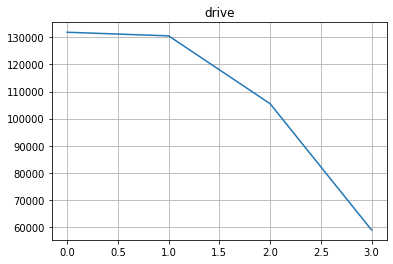

In [71]:

cnt = data['drive'].fillna('NA').value_counts()
print("num of values :", len(cnt))
print("Value_Counts")
print(cnt)

plt.grid()
plt.title('drive')
plt.plot(range(len(cnt)), cnt)

df_ratio_check_with_na = pd.DataFrame(cnt).reset_index().rename(columns = {'index' : 'drive', 'drive' :'cnts'})
cnts_total = sum(df_ratio_check_with_na['cnts'])
df_ratio_check_with_na['ratio'] = df_ratio_check_with_na['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check_with_na)):
  a += df_ratio_check_with_na['ratio'][i]
  cum_ratio.append(a)

df_ratio_check_with_na['cum_ratio'] = cum_ratio
print(" ")
print("cars' drive ratio with na")
print(df_ratio_check_with_na)

df_ratio_check = pd.DataFrame(cnt.drop('NA')).reset_index().rename(columns = {'index' : 'drive', 'drive' :'cnts'})
cnts_total = sum(df_ratio_check['cnts'])
df_ratio_check['ratio'] = df_ratio_check['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check)):
  a += df_ratio_check['ratio'][i]
  cum_ratio.append(a)

df_ratio_check['cum_ratio'] = cum_ratio
print(" ")
print("cars' drive ratio")
print(df_ratio_check)

결측값이 전체의 30%가 되기 때문에 other로 만들어줌

In [72]:
data['drive_gr'] = data['drive'].fillna('other')

In [73]:
data['drive_gr'].fillna('NA').value_counts()

4wd      131904
other    130567
fwd      105517
rwd       58892
Name: drive_gr, dtype: int64

num of values : 5
Value_Counts
NA             306361
full-size       63465
mid-size        34476
compact         19384
sub-compact      3194
Name: size, dtype: int64
 
cars' size ratio with na
          size    cnts      ratio   cum_ratio
0           NA  306361  71.767476   71.767476
1    full-size   63465  14.867176   86.634651
2     mid-size   34476   8.076274   94.710926
3      compact   19384   4.540855   99.251780
4  sub-compact    3194   0.748220  100.000000
 
cars' size ratio
          size   cnts      ratio   cum_ratio
0    full-size  63465  52.659747   52.659747
1     mid-size  34476  28.606278   81.266024
2      compact  19384  16.083771   97.349795
3  sub-compact   3194   2.650205  100.000000


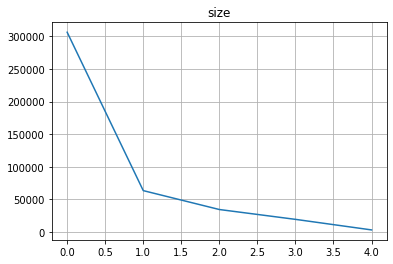

In [74]:

cnt = data['size'].fillna('NA').value_counts()
print("num of values :", len(cnt))
print("Value_Counts")
print(cnt)

plt.grid()
plt.title('size')
plt.plot(range(len(cnt)), cnt)

df_ratio_check_with_na = pd.DataFrame(cnt).reset_index().rename(columns = {'index' : 'size', 'size' :'cnts'})
cnts_total = sum(df_ratio_check_with_na['cnts'])
df_ratio_check_with_na['ratio'] = df_ratio_check_with_na['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check_with_na)):
  a += df_ratio_check_with_na['ratio'][i]
  cum_ratio.append(a)

df_ratio_check_with_na['cum_ratio'] = cum_ratio
print(" ")
print("cars' size ratio with na")
print(df_ratio_check_with_na)

df_ratio_check = pd.DataFrame(cnt.drop('NA')).reset_index().rename(columns = {'index' : 'size', 'size' :'cnts'})
cnts_total = sum(df_ratio_check['cnts'])
df_ratio_check['ratio'] = df_ratio_check['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check)):
  a += df_ratio_check['ratio'][i]
  cum_ratio.append(a)

df_ratio_check['cum_ratio'] = cum_ratio
print(" ")
print("cars' size ratio")
print(df_ratio_check)

Null값이 전체의 70%나 차지하여 변수로 사용하지 않음

num of values : 14
Value_Counts
NA             92858
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64
 
cars' type ratio with na
           type   cnts      ratio   cum_ratio
0            NA  92858  21.752717   21.752717
1         sedan  87056  20.393553   42.146271
2           SUV  77284  18.104385   60.250656
3        pickup  43510  10.192560   70.443216
4         truck  35279   8.264383   78.707599
5         other  22110   5.179442   83.887041
6         coupe  19204   4.498688   88.385729
7     hatchback  16598   3.888212   92.273941
8         wagon  10751   2.518506   94.792448
9           van   8548   2.002436   96.794884
10  convertible   7731   1.811048   98.605931
11     mini-van   4825   1.130294   99.736226
12      offroad    609  

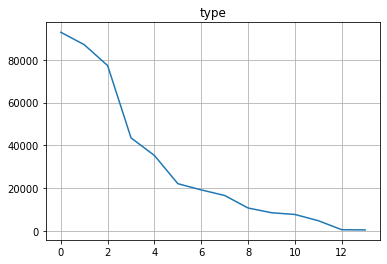

In [75]:

cnt = data['type'].fillna('NA').value_counts()
print("num of values :", len(cnt))
print("Value_Counts")
print(cnt)

plt.grid()
plt.title('type')
plt.plot(range(len(cnt)), cnt)

df_ratio_check_with_na = pd.DataFrame(cnt).reset_index().rename(columns = {'index' : 'type', 'type' :'cnts'})
cnts_total = sum(df_ratio_check_with_na['cnts'])
df_ratio_check_with_na['ratio'] = df_ratio_check_with_na['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check_with_na)):
  a += df_ratio_check_with_na['ratio'][i]
  cum_ratio.append(a)

df_ratio_check_with_na['cum_ratio'] = cum_ratio
print(" ")
print("cars' type ratio with na")
print(df_ratio_check_with_na)

df_ratio_check = pd.DataFrame(cnt.drop('NA')).reset_index().rename(columns = {'index' : 'type', 'type' :'cnts'})
cnts_total = sum(df_ratio_check['cnts'])
df_ratio_check['ratio'] = df_ratio_check['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check)):
  a += df_ratio_check['ratio'][i]
  cum_ratio.append(a)

df_ratio_check['cum_ratio'] = cum_ratio
print(" ")
print("cars' type ratio")
print(df_ratio_check)

결측값 및 하위 2%는 other 값으로 통합

In [76]:
grouping =  cnt.index[:11]
#grouping = ['automatic', 'manual']
print(grouping)

data['type_gr'] = data['type'].fillna('other').apply(lambda x: x if str(x) in grouping else 'other')
print(data['type_gr'].nunique(), data['type'].fillna('NA').nunique())
data['type_gr'].value_counts()

Index(['NA', 'sedan', 'SUV', 'pickup', 'truck', 'other', 'coupe', 'hatchback',
       'wagon', 'van', 'convertible'],
      dtype='object')
10 14


other          120919
sedan           87056
SUV             77284
pickup          43510
truck           35279
coupe           19204
hatchback       16598
wagon           10751
van              8548
convertible      7731
Name: type_gr, dtype: int64

num of values : 13
Value_Counts
NA        130203
white      79285
black      62861
silver     42970
blue       31223
red        30473
grey       24416
green       7343
custom      6700
brown       6593
yellow      2142
orange      1984
purple       687
Name: paint_color, dtype: int64
 
cars' paint_color ratio with na
   paint_color    cnts      ratio   cum_ratio
0           NA  130203  30.501078   30.501078
1        white   79285  18.573135   49.074213
2        black   62861  14.725684   63.799897
3       silver   42970  10.066061   73.865958
4         blue   31223   7.314234   81.180191
5          red   30473   7.138540   88.318731
6         grey   24416   5.719640   94.038371
7        green    7343   1.720156   95.758527
8       custom    6700   1.569528   97.328055
9        brown    6593   1.544462   98.872517
10      yellow    2142   0.501780   99.374297
11      orange    1984   0.464768   99.839065
12      purple     687   0.160935  100.000000
 
cars' paint_color ratio
   paint_co

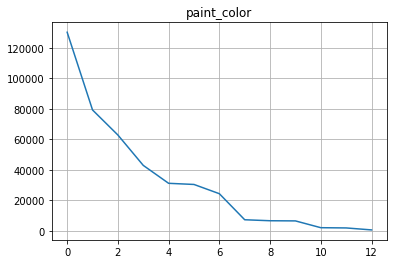

In [77]:

cnt = data['paint_color'].fillna('NA').value_counts()
print("num of values :", len(cnt))
print("Value_Counts")
print(cnt)

plt.grid()
plt.title('paint_color')
plt.plot(range(len(cnt)), cnt)

df_ratio_check_with_na = pd.DataFrame(cnt).reset_index().rename(columns = {'index' : 'paint_color', 'paint_color' :'cnts'})
cnts_total = sum(df_ratio_check_with_na['cnts'])
df_ratio_check_with_na['ratio'] = df_ratio_check_with_na['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check_with_na)):
  a += df_ratio_check_with_na['ratio'][i]
  cum_ratio.append(a)

df_ratio_check_with_na['cum_ratio'] = cum_ratio
print(" ")
print("cars' paint_color ratio with na")
print(df_ratio_check_with_na)

df_ratio_check = pd.DataFrame(cnt.drop('NA')).reset_index().rename(columns = {'index' : 'paint_color', 'paint_color' :'cnts'})
cnts_total = sum(df_ratio_check['cnts'])
df_ratio_check['ratio'] = df_ratio_check['cnts']/cnts_total * 100

cum_ratio = []
a = 0

for i in range(0, len(df_ratio_check)):
  a += df_ratio_check['ratio'][i]
  cum_ratio.append(a)

df_ratio_check['cum_ratio'] = cum_ratio
print(" ")
print("cars' paint_color ratio")
print(df_ratio_check)

결측값 제외 하위 1%는 결측값과 함께 other로 group

In [78]:
grouping =  cnt.drop('NA').index[:9]
#grouping = ['automatic', 'manual']
print(grouping)

data['paint_color_gr'] = data['paint_color'].fillna('other').apply(lambda x: x if str(x) in grouping else 'other')
print(data['paint_color_gr'].nunique(), data['paint_color'].fillna('NA').nunique())
data['paint_color_gr'].value_counts()

Index(['white', 'black', 'silver', 'blue', 'red', 'grey', 'green', 'custom',
       'brown'],
      dtype='object')
10 13


other     135016
white      79285
black      62861
silver     42970
blue       31223
red        30473
grey       24416
green       7343
custom      6700
brown       6593
Name: paint_color_gr, dtype: int64

### 8. 수치형 데이터 클리닝